# 1. Preparing the tools

In [1]:
import sys
import os

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Models
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier # For ANN
from sklearn.svm import SVC  # For SVM (Support Vector Machine)
from sklearn.naive_bayes import GaussianNB  # For Naive Bayes
from sklearn.naive_bayes import BernoulliNB  # For binary classification


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score

import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-01-07 21:13:54.966527

NumPy version: 2.2.1
pandas version: 2.2.3
matplotlib version: 3.10.0
Scikit-Learn version: 1.6.0


# 2. Loading Data

In [2]:
# Get project root directory
project_dir = os.path.abspath("..")
sys.path.append(project_dir)

from src import config

# Use absolute path instead of relative
df = pd.read_csv(os.path.join(project_dir, config.DIABETES_DATA_PATH))

df.shape 

(768, 9)

# 3. Data Exploration (EDA)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Count the number of missing values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Number of positive(1) and negative(0) samples in our dataframe
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# Normalized value counts
df.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

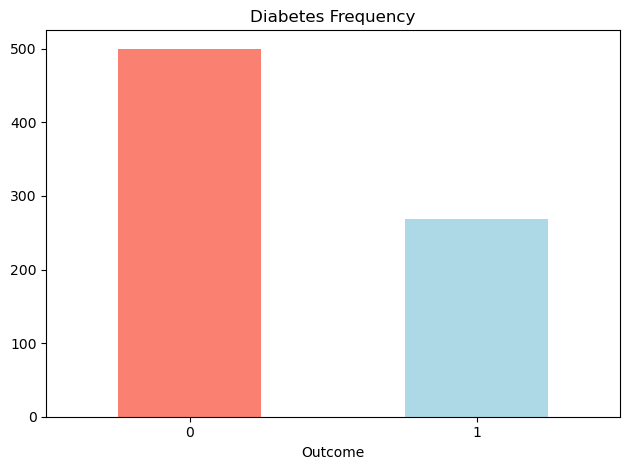

In [9]:
df.Outcome.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Diabetes Frequency")
plt.xticks(rotation=0)
plt.tight_layout()

### 3.1 Comparing one feature to another

In [10]:
# Define age bins and labels
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

pd.crosstab(
    df['Outcome'], 
    pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
)

Age,20-40,40-60,60-80,80-100
Outcome,,,,
0,401,76,22,1
1,160,99,9,0


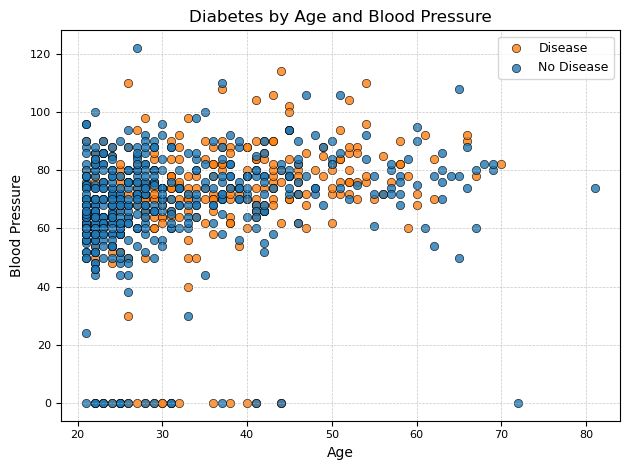

In [11]:
# Scatter plot for "Disease"
plt.scatter(
    df.Age[df.Outcome == 1],
    df.BloodPressure[df.Outcome == 1],
    c="#ff7f0e",  # CUD Orange
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

# Scatter plot for "No Disease"
plt.scatter(
    df.Age[df.Outcome == 0],
    df.BloodPressure[df.Outcome == 0],
    c="#1f77b4",  # CUD Blue
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

plt.title("Diabetes by Age and Blood Pressure", fontsize=12)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Blood Pressure", fontsize=10)

plt.legend(["Disease", "No Disease"], fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()

Outcome        0   1
Pregnancies         
0             73  38
1            106  29
2             84  19
3             48  27
4             45  23
5             36  21
6             34  16
7             20  25
8             16  22
9             10  18
10            14  10
11             4   7
12             5   4
13             5   5
14             0   2
15             0   1
17             0   1


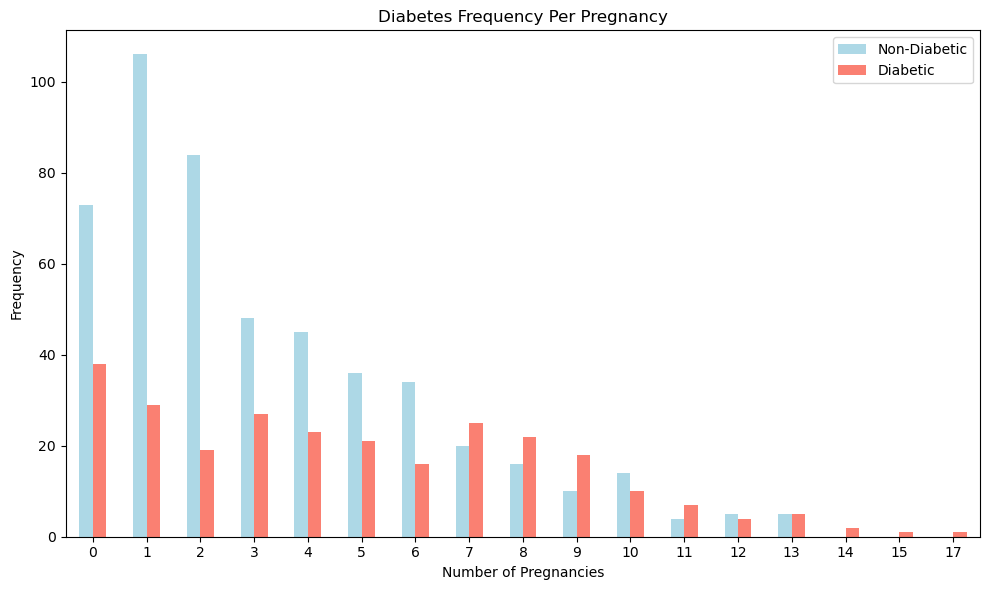

In [12]:
# Comparing Diabetes frequency and DiabetesPedigreeFunction

print(pd.crosstab(index=df.Pregnancies, columns=df.Outcome))

# Create a new crosstab and base plot
pd.crosstab(df.Pregnancies, df.Outcome).plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Diabetes Frequency Per Pregnancy")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Frequency")
plt.legend(["Non-Diabetic", "Diabetic"])
plt.xticks(rotation = 0)
plt.tight_layout()

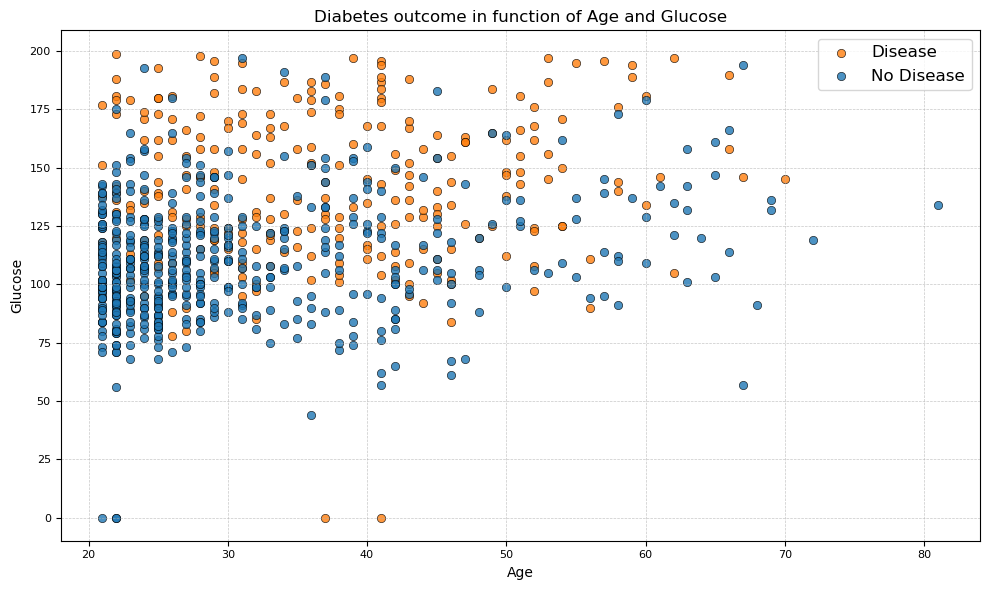

In [13]:
#Comparing Age and Glucose

plt.figure(figsize=(10,6))

# Scatter Plot for "Disease"
plt.scatter(df.Age[df.Outcome==1], 
            df.Glucose[df.Outcome==1], 
            c="#ff7f0e",  # CUD Orange
            alpha=0.8,
            edgecolor="black",
            linewidth=0.5) # define it as a scatter figure

# Scatter Plot for "No Disease"
plt.scatter(df.Age[df.Outcome==0], 
            df.Glucose[df.Outcome==0], 
            c="#1f77b4",  # CUD Blue
            alpha=0.8,
            edgecolor="black",
            linewidth=0.5) # axis always come as (x, y)

# Add some helpful info
plt.title("Diabetes outcome in function of Age and Glucose")
plt.xlabel("Age", fontsize=10)
plt.ylabel("Glucose", fontsize=10)

plt.legend(["Disease", "No Disease"], fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(visible=True, linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()

### 3.2 Histogram to check the distribution of the variables

In [14]:
def save_histograms(df, columns, output_dir, bins=15, color='#1f77b4', figsize=(3, 2)):
    """    
    Args:
    - df (pd.DataFrame): DataFrame containing the data.
    - columns (list): List of column names to plot.
    - output_dir (str): Directory to save the images.
    - bins (int): Number of bins for the histograms.
    - color (str): Color of the histograms (color-blind friendly).
    - figsize (tuple): Size of each figure (width, height).
    """
    for col in columns:
        plt.figure(figsize=figsize)
        sns.histplot(
            df[col],
            bins=bins,
            kde=False,
            color=color,
            edgecolor='black'
        )
        
        # Remove axis labels
        plt.xlabel("")  # Remove x-axis label text
        plt.ylabel("")  # Remove y-axis label text
        
        # Add title
        plt.title(col, fontsize=12)
        
        # Enable grid
        plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Format layout
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f"{output_dir}/{col}_histogram.png", dpi=300, bbox_inches='tight')
        plt.close()

# List of columns to plot
columns_to_plot = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
    'BMI', 'DiabetesPedigreeFunction', 'Age'
]

output_directory = os.path.join(project_dir, "reports", "figures", "histograms", "diabetes")
os.makedirs(output_directory, exist_ok=True)

# Call function to save histograms
save_histograms(df, columns_to_plot, output_directory, bins=15,  color='#1f77b4', figsize=(3.5, 2.5))

### 3.3 Correlation between independent variables

In [15]:
# Correlation between our independent variables
X = df.drop(columns=['Outcome'])
y = df['Outcome'].values

corr_matrix = X.corr()
corr_matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


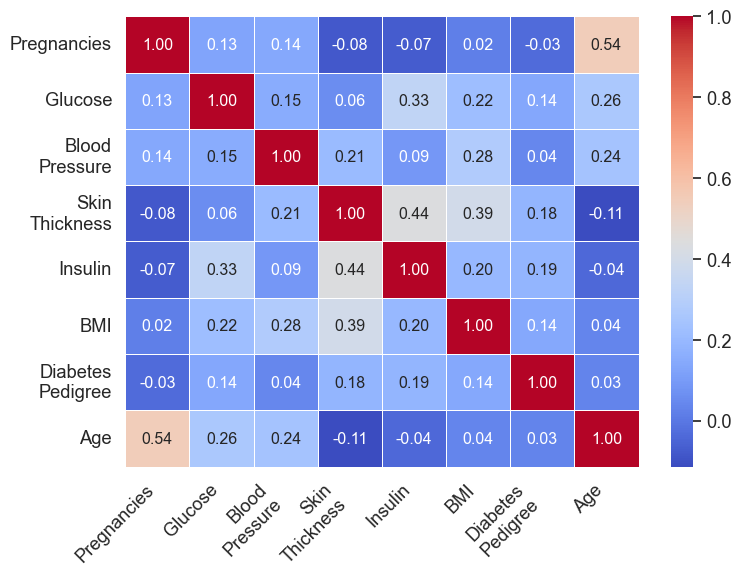

In [24]:

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)

# Create shorter labels mapping
label_map = {
    'DiabetesPedigreeFunction': 'Diabetes\nPedigree',
    'BloodPressure': 'Blood\nPressure',
    'SkinThickness': 'Skin\nThickness' 
}

# Create new labels while keeping others unchanged
new_labels = [label_map.get(col, col) for col in corr_matrix.columns]

# Create heatmap with new labels
sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="coolwarm",
    annot_kws={"size": 11.5},
    xticklabels=new_labels,
    yticklabels=new_labels
)

# Adjust label positioning
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# 4. Modeling

In [17]:
# Prepare the features and target variables.

X = df.drop(labels="Outcome", axis=1)

# Target variable (in the form of a NumPy array)
y = df.Outcome.to_numpy() 

### 4.1 Creating a training and test split

In [31]:
# Split into train & test set
# Random seed for reproducible results
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2, # percentage of data to use for test set
                                                    stratify=y) # keep the same proportion of target as the original dataset instead of random

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)


In [32]:
# Training data of independent variable
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22


In [20]:
# Training data of dependent variable
y_train, len(y_train)

(array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 

In [21]:
# Testing data of independent variable
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159,64,0,0,27.4,0.294,40
672,10,68,106,23,49,35.5,0.285,47
700,2,122,76,27,200,35.9,0.483,26
630,7,114,64,0,0,27.4,0.732,34
81,2,74,0,0,0,0.0,0.102,22


In [22]:
# Testing data of dependent variable
y_test, len(y_test)

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]),
 154)

### 4.2 Choosing a model

We'll start by trying the following models and comparing their results.

1. K-Nearest Neighbors - sklearn.neighbors.KNeighboursClassifier()
2. Logistic Regression - sklearn.linear_model.LogisticRegression()
3. RandomForest - sklearn.ensemble.RandomForestClassifier()
4. Decision Tree: sklearn.tree.DecisionTreeClassifier()
5. SVC: sklearn.svm.SVC()
6. ANN: MLPClassifier()
7. Naive Bayes (Gaussian): sklearn.naive_bayes.GaussianNB()
8. Naive Bayes (Bernoulli): sklearn.naive_bayes.BernoulliNB()

In [23]:
#Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=2000, C=1.0), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVC": SVC(),
          "ANN": MLPClassifier(max_iter=1000),
          "Naive Bayes (Gaussian)": GaussianNB(),
          "Naive Bayes (Bernoulli)": BernoulliNB()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    # Fits and evaluates given machine learning models.
    # models : a dict of different Scikit-Learn machine learning models
    # X_train : training data
    # X_test : testing data
    # y_train : labels assosciated with training data
    # y_test : labels assosciated with test data
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

{'KNN': 0.6688311688311688,
 'Logistic Regression': 0.7142857142857143,
 'Random Forest': 0.7727272727272727,
 'Decision Tree': 0.7337662337662337,
 'SVC': 0.7207792207792207,
 'ANN': 0.6753246753246753,
 'Naive Bayes (Gaussian)': 0.7077922077922078,
 'Naive Bayes (Bernoulli)': 0.6493506493506493}

In [25]:
recall_scores = {
    name: recall_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

recall_scores

{'KNN': 0.6688311688311688,
 'Logistic Regression': 0.7142857142857143,
 'Random Forest': 0.7727272727272727,
 'Decision Tree': 0.7337662337662337,
 'SVC': 0.7207792207792207,
 'ANN': 0.6753246753246753,
 'Naive Bayes (Gaussian)': 0.7077922077922078,
 'Naive Bayes (Bernoulli)': 0.6493506493506493}

In [26]:
precision_scores = {
    name: precision_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}
precision_scores


{'KNN': 0.6622493153105398,
 'Logistic Regression': 0.7064642282033586,
 'Random Forest': 0.7676396997497915,
 'Decision Tree': 0.7250141163184641,
 'SVC': 0.7106187929717341,
 'ANN': 0.6843879524730588,
 'Naive Bayes (Gaussian)': 0.7178798638343852,
 'Naive Bayes (Bernoulli)': 0.6037157287157287}

### 4.3 Comparing the results of several models

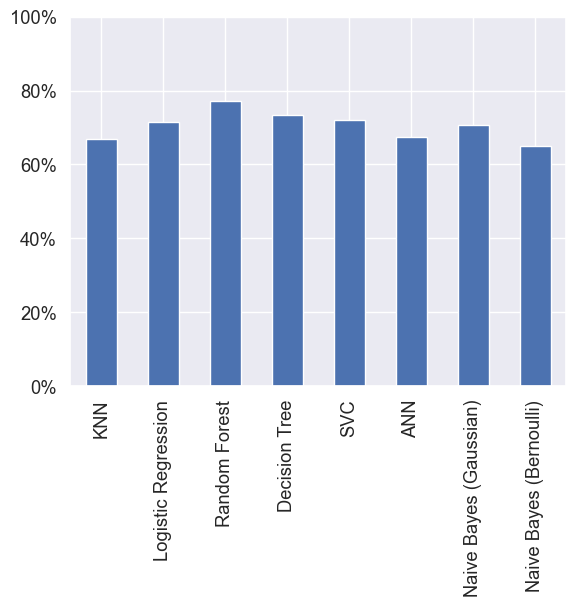

In [27]:

model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

plt.xticks(rotation=90, ha='center')

# Set y-axis limits and format to percentage
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

plt.gca().get_legend().remove()


#### 4.3.1 Some more exaluations

In [28]:
f1_scores = {
    name: f1_score(y_test, model.predict(X_test), average='weighted')
    for name, model in models.items()
}

In [29]:
specificity_scores = {}
for name, model in models.items():
    cm = confusion_matrix(y_test, model.predict(X_test))
    tn = cm[0][0]
    fp = cm[0][1]
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity_scores[name] = specificity

In [30]:
classification_error_scores = {
    name: 1 - accuracy
    for name, accuracy in model_scores.items()
}

In [31]:
model_comparison = pd.DataFrame({
    "Accuracy (%)": [score * 100 for score in model_scores.values()],
    "Recall (%)": [score * 100 for score in recall_scores.values()],
     "Precision (%)": [score * 100 for score in precision_scores.values()],
    "F1 Score (%)": [score * 100 for score in f1_scores.values()],
    "Specificity (%)": [score * 100 for score in specificity_scores.values()],
    "Classification Error (%)": [error * 100 for error in classification_error_scores.values()]
    
}, index=model_scores.keys())

# Optional: Pretty-print the table
model_comparison.style.format({"Accuracy (%)": "{:.2f}", 
                               "Recall (%)": "{:.2f}",
                               "Precision (%)": "{:.2f}", 
                               "F1 Score (%)": "{:.2f}", 
                               "Specificity (%)": "{:.2f}", 
                               "Classification Error (%)": "{:.2f}"})

,Accuracy (%),Recall (%),Precision (%),F1 Score (%),Specificity (%),Classification Error (%)
KNN,66.88,66.88,66.22,66.48,77.00,33.12
Logistic Regression,71.43,71.43,70.65,70.84,82.00,28.57
Random Forest,77.27,77.27,76.76,76.73,87.00,22.73
Decision Tree,73.38,73.38,72.50,72.16,87.00,26.62
SVC,72.08,72.08,71.06,70.31,88.00,27.92
ANN,67.53,67.53,68.44,67.88,72.00,32.47
Naive Bayes (Gaussian),70.78,70.78,71.79,71.14,74.00,29.22
Naive Bayes (Bernoulli),64.94,64.94,60.37,56.04,95.00,35.06


### 4.4 Ensemble Method: Max Voting (Hard & Soft)

In [32]:
# Define other classifiers for VotingClassifier
log_reg = LogisticRegression(max_iter=1500)
rf = RandomForestClassifier(n_estimators=100)
svc = SVC(probability=True)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()

# Setup VotingClassifier with hard voting
voting_hard = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), ('svc', svc), ('naive_bayes', naive_bayes), ('knn', knn)], voting='hard')

voting_hard.fit(X_train, y_train)

print(f"VotingClassifier with hard voting model test score: {voting_hard.score(X_test, y_test)}")
print(f"VotingClassifier with hard voting model test recall score: {recall_score(y_test, voting_hard.predict(X_test), average='weighted')}")
print(f"VotingClassifier with hard voting model test precision score: {precision_score(y_test, voting_hard.predict(X_test), average='weighted')}")

# Setup VotingClassifier with soft voting
voting_soft = VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), ('svc', svc), ('naive_bayes', naive_bayes), ('knn', knn)], voting='soft')

voting_soft.fit(X_train, y_train)

print(f"VotingClassifier with soft voting model test score: {voting_soft.score(X_test, y_test)}")
print(f"VotingClassifier with soft voting model test recall score: {recall_score(y_test, voting_soft.predict(X_test), average='weighted')}")
print(f"VotingClassifier with soft voting model test precision score: {precision_score(y_test, voting_soft.predict(X_test), average='weighted')}")

VotingClassifier with hard voting model test score: 0.7337662337662337
VotingClassifier with hard voting model test recall score: 0.7337662337662337
VotingClassifier with hard voting model test precision score: 0.7263910401525081


VotingClassifier with soft voting model test score: 0.7337662337662337
VotingClassifier with soft voting model test recall score: 0.7337662337662337
VotingClassifier with soft voting model test precision score: 0.7289513207880556


# 5. Hyperparameter Tuning

In [26]:
# Define KNN hyperparameters
knn_grid = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": np.arange(20, 60, 5),
    "p": [1, 2]
}

# Define LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Define RandomForestClassifier hyperparameters
rf_grid = {
    "n_estimators": np.arange(50, 500, 50),  
    "max_depth": [None, 5, 10],              
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(1, 10, 2)
}

# Define DecisionTreeClassifier hyperparameter
dt_grid = {
    "max_depth": [None, 3, 5, 10, 20],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features": [None, "sqrt", "log2"]
}

# Define SVC linear hyperparameters
svc_grid_linear = {
    "C": np.logspace(-2, 2, 5),
    "kernel": ["linear"],
    "gamma": ["scale"]
}

# Define SVC RBF hyperparameters
svc_grid_rbf = {
    "C": np.logspace(-4, 4, 20),
    "kernel": ["rbf"],
    "gamma": ["scale", "auto"]
}

# Define SVC poly hyperparameters
svc_grid_poly = {
    "C": np.logspace(-2, 2, 5),
    "kernel": ["poly"],
    "degree": [2, 3],  # Fewer degrees
    "gamma": ["scale"]
}

# Define SVC sigmoid hyperparameters
svc_grid_sigmoid = {
    "C": np.logspace(-2, 2, 5),
    "kernel": ["sigmoid"],
    "gamma": ["scale", "auto"]
}

# Define ANN hyperparameters
ann_grid = {
    "hidden_layer_sizes": [(50,), (100,), (50, 50)],
    "activation": ["tanh", "relu"], # Activation function
    "solver": ["adam", "sgd"],
    "alpha": np.logspace(-4, 4, 10),
    "learning_rate": ["constant", "adaptive"]
}

# Define Naive Bayes (Gaussian) hyperparameters
nb_gaussian_grid = {
    "var_smoothing": np.logspace(-9, 0, 10)  # Smoothing parameter
}

# Define Naive Bayes (Bernoulli) hyperparameters
nb_bernoulli_grid = {
    "alpha": np.logspace(-4, 4, 20),  # Additive smoothing parameter
    "binarize": [0.0, 0.1, 0.2, 0.3],  # Threshold for binarizing input
}

# Define VortingClassifier hyperparameters
voting_grid = {
    'voting': ['hard', 'soft'],  # Hard and soft voting
    'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1]],  # Weighted voting
    'flatten_transform': [True, False]
}

### 5.1 Tune KNeighborsClassifier (KNN) by hand

In [33]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [34]:
# KNN's train scores
train_scores

[1.0,
 0.8436482084690554,
 0.8566775244299675,
 0.8175895765472313,
 0.8045602605863192,
 0.7899022801302932,
 0.7817589576547231,
 0.7866449511400652,
 0.7947882736156352,
 0.7833876221498371,
 0.7915309446254072,
 0.7768729641693811,
 0.7817589576547231,
 0.7817589576547231,
 0.7785016286644951,
 0.7817589576547231,
 0.7752442996742671,
 0.7850162866449512,
 0.7866449511400652,
 0.7833876221498371]

Maximum KNN score on the test data: 72.73%


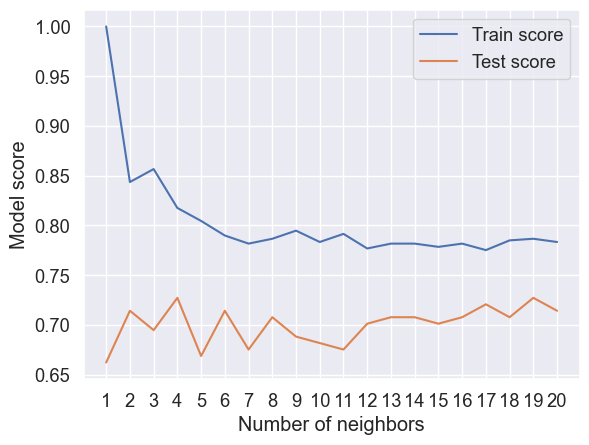

In [35]:
#Let's visualize KNN score test and train data
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### 5.2 Tuning models with with RandomizedSearchCV

In [36]:
# KNeighborsClassifier with RandomizedSearchCV

# Setup random hyperparameter search for KNN
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                            param_distributions=knn_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model
rs_knn.fit(X_train, y_train)

print("Best parameters for KNN with RandomizedSearchCV:", rs_knn.best_params_)

print("RandomizedSearchCV (KNN) model test score:", rs_knn.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for KNN with RandomizedSearchCV: {'weights': 'uniform', 'p': 1, 'n_neighbors': np.int64(10), 'leaf_size': np.int64(20), 'algorithm': 'brute'}
RandomizedSearchCV (KNN) model test score: 0.7012987012987013


In [38]:
# Logistic Regression with RandomizedSearchCV

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression with RandomizedSearchCV:", rs_log_reg.best_params_)

print("RandomizedSearchCV (Logistic Regression) model test score:", rs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best parameters for Logistic Regression with RandomizedSearchCV: {'solver': 'liblinear', 'C': np.float64(78.47599703514607)}
RandomizedSearchCV (Logistic Regression) model test score: 0.7142857142857143


In [39]:
# RandomForestClassifier with RandomizedSearchCV

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

print('Best parameters for Random Forest with RandomizedSearchCV:', rs_rf.best_params_)

print('RandomizedSearchCV (Random Forest) model test score:', rs_rf.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best parameters for Random Forest with RandomizedSearchCV: {'n_estimators': np.int64(100), 'min_samples_split': np.int64(8), 'min_samples_leaf': np.int64(9), 'max_depth': 10}
RandomizedSearchCV (Random Forest) model test score: 0.7337662337662337


In [40]:
# DecisionTreeClassifier with RandomizedSearchCV

# Setup random hyperparameter search for DecisionTreeClassifier
rs_dt = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=dt_grid,
    cv=5,
    n_iter=20,
    verbose=True,
    random_state=42
)

# Fit the random hyperparameter search model
rs_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree with RandomizedSearchCV:", rs_dt.best_params_)

print("RandomizedSearchCV (Decision Tree) model test score:", rs_dt.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best parameters for Decision Tree with RandomizedSearchCV: {'min_samples_split': np.int64(10), 'min_samples_leaf': np.int64(17), 'max_features': None, 'max_depth': 3}
RandomizedSearchCV (Decision Tree) model test score: 0.6948051948051948


In [41]:
# SVC with linear kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_linear = RandomizedSearchCV(SVC(),
                            param_distributions=svc_grid_linear,
                            cv=3,
                            n_iter=10,
                            verbose=True)

# Fit random hyperparameter search model
rs_svc_linear.fit(X_train, y_train)

print("Best parameters for SVC (linear) with RandomizedSearchCV:", rs_svc_linear.best_params_)

print("RandomizedSearchCV (SVC linear) model test score:", rs_svc_linear.score(X_test, y_test))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVC (linear) with RandomizedSearchCV: {'kernel': 'linear', 'gamma': 'scale', 'C': np.float64(0.1)}
RandomizedSearchCV (SVC linear) model test score: 0.7077922077922078


In [42]:
# SVC with RBF kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_rbf = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid_rbf,
                                cv=3,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model
rs_svc_rbf.fit(X_train, y_train)

print("Best parameters for SVC (RBF) with RandomizedSearchCV:", rs_svc_rbf.best_params_)

print("RandomizedSearchCV (SVC RBF) model test score:", rs_svc_rbf.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Best parameters for SVC (RBF) with RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'scale', 'C': np.float64(1.623776739188721)}
RandomizedSearchCV (SVC RBF) model test score: 0.7337662337662337


In [43]:

# SVC with poly kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_poly = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid_poly,
                                cv=3,
                                n_iter=5,
                                verbose=True,
                                n_jobs=-1) # Use all available CPU cores

# Fit random hyperparameter search model
rs_svc_poly.fit(X_train, y_train)

print("Best parameters for SVC (poly) with RandomizedSearchCV:", rs_svc_poly.best_params_)

print("RandomizedSearchCV (SVC poly) model test score:", rs_svc_poly.score(X_test, y_test))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


Best parameters for SVC (poly) with RandomizedSearchCV: {'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'C': np.float64(1.0)}
RandomizedSearchCV (SVC poly) model test score: 0.7207792207792207


In [44]:
# SVC with sigmoid kernel and RandomizedSearchCV

# Setup random hyperparameter search for SVC
rs_svc_sigmoid = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid_sigmoid,
                                cv=3,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model
rs_svc_sigmoid.fit(X_train, y_train)

print("Best parameters for SVC (sigmoid) with RandomizedSearchCV:", rs_svc_sigmoid.best_params_)

print("RandomizedSearchCV (SVC sigmoid) model test score:", rs_svc_sigmoid.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for SVC (sigmoid) with RandomizedSearchCV: {'kernel': 'sigmoid', 'gamma': 'scale', 'C': np.float64(0.01)}
RandomizedSearchCV (SVC sigmoid) model test score: 0.6493506493506493


In [45]:
# ANN with RandomizedSearchCV

# Setup random hyperparameter search for ANN
rs_ann = RandomizedSearchCV(MLPClassifier(max_iter=3000),
                            param_distributions=ann_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

# Fit random hyperparameter search model
rs_ann.fit(X_train, y_train)

print("Best parameters for ANN with RandomizedSearchCV:", rs_ann.best_params_)

print("RandomizedSearchCV (ANN) model test score:", rs_ann.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best parameters for ANN with RandomizedSearchCV: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': np.float64(2.782559402207126), 'activation': 'relu'}
RandomizedSearchCV (ANN) model test score: 0.6883116883116883


In [46]:
# Gaussian Naive Bayes with RandomizedSearchCV

# Setup random hyperparameter search for GaussianNB
rs_nb_gaussian = RandomizedSearchCV(GaussianNB(), 
                                    param_distributions=nb_gaussian_grid, 
                                    cv=5, 
                                    n_iter=10, 
                                    verbose=True, 
                                    random_state=42)

# Fit random hyperparameter search model
rs_nb_gaussian.fit(X_train, y_train)

print("Best parameters for Gaussian Naive Bayes with RandomizedSearchCV:", rs_nb_gaussian.best_params_)

print("RandomizedSearchCV (Gaussian Naive Bayes) model test score:", rs_nb_gaussian.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gaussian Naive Bayes with RandomizedSearchCV: {'var_smoothing': np.float64(1e-05)}
RandomizedSearchCV (Gaussian Naive Bayes) model test score: 0.6883116883116883


In [47]:
# Bernoulli Naive Bayes with RandomizedSearchCV

# Setup random hyperparameter search for BernoulliNB
rs_nb_bernoulli = RandomizedSearchCV(BernoulliNB(), 
                                     param_distributions=nb_bernoulli_grid, 
                                     cv=5, 
                                     n_iter=20, 
                                     verbose=True, 
                                     random_state=42)

# Fit random hyperparameter search model
rs_nb_bernoulli.fit(X_train, y_train)

print("Best parameters for Bernoulli Naive Bayes with RandomizedSearchCV:", rs_nb_bernoulli.best_params_)

print("RandomizedSearchCV (Bernoulli Naive Bayes) model test score:", rs_nb_bernoulli.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Bernoulli Naive Bayes with RandomizedSearchCV: {'binarize': 0.2, 'alpha': np.float64(1438.44988828766)}
RandomizedSearchCV (Bernoulli Naive Bayes) model test score: 0.6493506493506493


In [48]:
# VotingClassifier with RandomizedSearchCV

# Setup random hyperparameter search for VotingClassifier
rs_voting = RandomizedSearchCV(VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), 
                                                            # ('svc', svc), 
                                                            ('naive_bayes', naive_bayes), ('knn', knn)], voting='soft'),
                               param_distributions=voting_grid,
                               cv=5,
                               n_iter=10,
                               verbose=True)

rs_voting.fit(X_train, y_train)

print("Best parameters for VotingClassifier with RandomizedSearchCV:", rs_voting.best_params_)

print("RandomizedSearchCV (VotingClassifier) model test score:", rs_voting.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best parameters for VotingClassifier with RandomizedSearchCV: {'weights': [1, 2, 1, 1], 'voting': 'hard', 'flatten_transform': False}
RandomizedSearchCV (VotingClassifier) model test score: 0.7402597402597403


In [49]:
# Define function to calculate classification error and specificity

def classification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum(axis=1) - cm.diagonal()  # True negatives for each class
    fp = cm.sum(axis=0) - cm.diagonal()  # False positives for each class
    specificity_per_class = tn / (tn + fp + 1e-10)  # Avoid division by zero
    return specificity_per_class.mean()  # Average specificity across all classes

tuned_model_scores = {
     "KNN": {
        "Accuracy": accuracy_score(y_test, rs_knn.predict(X_test)),
        "Precision": precision_score(y_test, rs_knn.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_knn.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_knn.predict(X_test)),
        "Specificity": specificity(y_test, rs_knn.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_knn.predict(X_test), average="weighted"),
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, rs_log_reg.predict(X_test)),
        "Precision": precision_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_log_reg.predict(X_test)),
        "Specificity": specificity(y_test, rs_log_reg.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_log_reg.predict(X_test), average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rs_rf.predict(X_test)),
        "Precision": precision_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_rf.predict(X_test)),
        "Specificity": specificity(y_test, rs_rf.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_rf.predict(X_test), average="weighted"),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, rs_dt.predict(X_test)),
        "Precision": precision_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_dt.predict(X_test)),
        "Specificity": specificity(y_test, rs_dt.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_dt.predict(X_test), average="weighted"),
    },
    "SVC (Linear)": {
        "Accuracy": accuracy_score(y_test, rs_svc_linear.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_linear.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_linear.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_linear.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_linear.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_linear.predict(X_test), average="weighted"),
    },
    "SVC (RBF)": {
        "Accuracy": accuracy_score(y_test, rs_svc_rbf.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_rbf.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_rbf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_rbf.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_rbf.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_rbf.predict(X_test), average="weighted"),
    },
    "SVC (Poly)": {
        "Accuracy": accuracy_score(y_test, rs_svc_poly.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_poly.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_poly.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_poly.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_poly.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_poly.predict(X_test), average="weighted"),
    },
    "SVC (Sigmoid)": {
        "Accuracy": accuracy_score(y_test, rs_svc_sigmoid.predict(X_test)),
        "Precision": precision_score(y_test, rs_svc_sigmoid.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_svc_sigmoid.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_svc_sigmoid.predict(X_test)),
        "Specificity": specificity(y_test, rs_svc_sigmoid.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_svc_sigmoid.predict(X_test), average="weighted"),
    },
    "ANN": {
        "Accuracy": accuracy_score(y_test, rs_ann.predict(X_test)),
        "Precision": precision_score(y_test, rs_ann.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_ann.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_ann.predict(X_test)),
        "Specificity": specificity(y_test, rs_ann.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_ann.predict(X_test), average="weighted"),
    },
    "Naive Bayes (GaussianNB)": {
        "Accuracy": accuracy_score(y_test, rs_nb_gaussian.predict(X_test)),
        "Precision": precision_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_nb_gaussian.predict(X_test)),
        "Specificity": specificity(y_test, rs_nb_gaussian.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_nb_gaussian.predict(X_test), average="weighted"),
    },
    "Naive Bayes (BernoulliNB)": {
        "Accuracy": accuracy_score(y_test, rs_nb_bernoulli.predict(X_test)),
        "Precision": precision_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_nb_bernoulli.predict(X_test)),
        "Specificity": specificity(y_test, rs_nb_bernoulli.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_nb_bernoulli.predict(X_test), average="weighted"),
    },
    "VotingClassifier": {
        "Accuracy": accuracy_score(y_test, rs_voting.predict(X_test)),
        "Precision": precision_score(y_test, rs_voting.predict(X_test), average="weighted"),
        "Recall (Sensitivity)": recall_score(y_test, rs_voting.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_voting.predict(X_test)),
        "Specificity": specificity(y_test, rs_voting.predict(X_test)),
        "F1 Score": f1_score(y_test, rs_voting.predict(X_test), average="weighted"),
    }
}

# Convert results to a DataFrame
tuned_model_comparison = pd.DataFrame(tuned_model_scores).T * 100  # Convert to percentages

# Optional: Pretty-print the table
tuned_model_comparison.style.format({"Accuracy": "{:.2f}%",
    "Precision": "{:.2f}%",
    "Recall (Sensitivity)": "{:.2f}%",
    "Classification Error": "{:.2f}%",
    "Specificity": "{:.2f}%",
    "F1 Score": "{:.2f}%"})

/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall (Sensitivity),Classification Error,Specificity,F1 Score
KNN,70.78%,69.53%,70.78%,29.22%,50.00%,69.19%
Logistic Regression,71.43%,70.65%,71.43%,28.57%,50.00%,70.84%
Random Forest,73.38%,72.56%,73.38%,26.62%,50.00%,72.56%
Decision Tree,69.48%,68.47%,69.48%,30.52%,50.00%,65.38%
SVC (Linear),70.78%,69.89%,70.78%,29.22%,50.00%,70.08%
SVC (RBF),73.38%,72.53%,73.38%,26.62%,50.00%,71.93%
SVC (Poly),72.08%,71.14%,72.08%,27.92%,50.00%,70.03%
SVC (Sigmoid),64.94%,42.17%,64.94%,35.06%,50.00%,51.13%
ANN,68.83%,67.12%,68.83%,31.17%,50.00%,66.05%
Naive Bayes (GaussianNB),68.83%,69.40%,68.83%,31.17%,50.00%,69.07%


### 5.3 Tuning models with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is:

- sklearn.model_selection.RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations (e.g. will explore random combinations of the hyperparameters for a defined number of iterations).
- sklearn.model_selection.GridSearchCV will test every single possible combination of hyperparameters in the grid (this is a thorough test but can take quite a long time).

In [50]:
# KNeighborsClassifier with GridSearchCV

# Setup grid hyperparameter search for KNN
gs_knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid=knn_grid,
                      cv=5,
                      verbose=True)

# Fit grid hyperparameter search for KNN
gs_knn.fit(X_train, y_train)

print("Best parameters for KNN with GridSearchCV:", gs_knn.best_params_)

print("GridSearchCV (KNN) model test score:", gs_knn.score(X_test, y_test))

Fitting 5 folds for each of 2560 candidates, totalling 12800 fits


Best parameters for KNN with GridSearchCV: {'algorithm': 'auto', 'leaf_size': np.int64(20), 'n_neighbors': np.int64(12), 'p': 2, 'weights': 'uniform'}
GridSearchCV (KNN) model test score: 0.7012987012987013


In [51]:
# Logistic Regression with GridSearchCV

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)


print("Best parameters for Logistic Regression with GridSearchCV:", gs_log_reg.best_params_)

print("GridSearchCV (Logistic Regression) model test score:", gs_log_reg.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression with GridSearchCV: {'C': np.float64(78.47599703514607), 'solver': 'liblinear'}
GridSearchCV (Logistic Regression) model test score: 0.7142857142857143


In [52]:
# RandomForestClassifier with GridSearchCV

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=3,
                     n_jobs=-1,
                     verbose=True)

# Fit grid hyperparameter search for RandomForestClassifier
gs_rf.fit(X_train, y_train)

print("Best parameters for Random Forest with GridSearchCV:", gs_rf.best_params_)

print("GridSearchCV (Random Forest) model test score:", gs_rf.score(X_test, y_test))

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


Best parameters for Random Forest with GridSearchCV: {'max_depth': 5, 'min_samples_leaf': np.int64(3), 'min_samples_split': np.int64(2), 'n_estimators': np.int64(50)}
GridSearchCV (Random Forest) model test score: 0.7207792207792207


In [53]:
# DecisionTreeClassifier with GridSearchCV

# Setup grid hyperparameter search for DecisionTreeClassifier
gs_dt = GridSearchCV(DecisionTreeClassifier(),
                     param_grid=dt_grid,
                     cv=5,
                     verbose=True)

# Fit grid hyperparameter search for DecisionTreeClassifier
gs_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree with GridSearchCV:", gs_dt.best_params_)

print("GridSearchCV (Decision Tree) model test score:", gs_dt.score(X_test, y_test))

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


Best parameters for Decision Tree with GridSearchCV: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': np.int64(13), 'min_samples_split': np.int64(10)}
GridSearchCV (Decision Tree) model test score: 0.7272727272727273


In [54]:
# SVC with linear kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_linear = GridSearchCV(SVC(),
                             param_grid=svc_grid_linear,
                             cv=5,
                             verbose=True)

# Fit grid hyperparameter search for SVC
gs_svc_linear.fit(X_train, y_train)

print("Best parameters for SVC (linear) with GridSearchCV:", gs_svc_linear.best_params_)

print("GridSearchCV (SVC linear) model test score:", gs_svc_linear.score(X_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


Best parameters for SVC (linear) with GridSearchCV: {'C': np.float64(10.0), 'gamma': 'scale', 'kernel': 'linear'}
GridSearchCV (SVC linear) model test score: 0.7142857142857143


In [55]:
# SVC with RBF kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_rbf = GridSearchCV(SVC(),
                          param_grid=svc_grid_rbf,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search for SVC
gs_svc_rbf.fit(X_train, y_train)

print("Best parameters for SVC (RBF) with GridSearchCV:", gs_svc_rbf.best_params_)

print("GridSearchCV (SVC RBF) model test score:", gs_svc_rbf.score(X_test, y_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best parameters for SVC (RBF) with GridSearchCV: {'C': np.float64(4.281332398719396), 'gamma': 'scale', 'kernel': 'rbf'}
GridSearchCV (SVC RBF) model test score: 0.7337662337662337


In [37]:
# SVC with poly kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_poly = GridSearchCV(SVC(),
                           param_grid=svc_grid_poly,
                           cv=5,
                           verbose=True,
                           n_jobs=-1)

# Fit grid hyperparameter search for SVC
gs_svc_poly.fit(X_train, y_train)

print("Best parameters for SVC (poly) with GridSearchCV:", gs_svc_poly.best_params_)

print("GridSearchCV (SVC poly) model test score:", gs_svc_poly.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for SVC (poly) with GridSearchCV: {'C': np.float64(10.0), 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
GridSearchCV (SVC poly) model test score: 0.7467532467532467


In [57]:
# SVC with sigmoid kernel and GridSearchCV

# Setup grid hyperparameter search for SVC
gs_svc_sigmoid = GridSearchCV(SVC(),
                              param_grid=svc_grid_sigmoid,
                              cv=5,
                              verbose=True)

# Fit grid hyperparameter search for SVC
gs_svc_sigmoid.fit(X_train, y_train)

print("Best parameters for SVC (sigmoid) with GridSearchCV:", gs_svc_sigmoid.best_params_)

print("GridSearchCV (SVC sigmoid) model test score:", gs_svc_sigmoid.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best parameters for SVC (sigmoid) with GridSearchCV: {'C': np.float64(0.01), 'gamma': 'scale', 'kernel': 'sigmoid'}
GridSearchCV (SVC sigmoid) model test score: 0.6493506493506493


In [58]:
# ANN with GridSearchCV

# Setup grid hyperparameter search for ANN (MLPClassifier)
gs_ann = GridSearchCV(MLPClassifier(max_iter=5000),
                      param_grid=ann_grid,
                      cv=5,
                      verbose=True,
                      n_jobs=-1)

# Fit grid hyperparameter search for ANN
gs_ann.fit(X_train, y_train)

print("Best parameters for ANN with GridSearchCV:", gs_ann.best_params_)

print("GridSearchCV (ANN) model test score:", gs_ann.score(X_test, y_test))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Best parameters for ANN with GridSearchCV: {'activation': 'relu', 'alpha': np.float64(21.54434690031882), 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
GridSearchCV (ANN) model test score: 0.7077922077922078


In [59]:
# Naive Bayes (GaussianNB) with GridSearchCV

# Setup grid hyperparameter search for Naive Bayes (GaussianNB)
gs_nb_gaussian = GridSearchCV(GaussianNB(),
                              param_grid=nb_gaussian_grid,
                              cv=5,
                              verbose=True)

# Fit grid hyperparameter search for Naive Bayes (GaussianNB)
gs_nb_gaussian.fit(X_train, y_train)

print("Best parameters for Gaussian Naive Bayes with GridSearchCV:", gs_nb_gaussian.best_params_)

print("GridSearchCV (Gaussian Naive Bayes) model test score:", gs_nb_gaussian.score(X_test, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gaussian Naive Bayes with GridSearchCV: {'var_smoothing': np.float64(1e-05)}
GridSearchCV (Gaussian Naive Bayes) model test score: 0.6883116883116883


In [60]:
# Naive Bayes (BernoulliNB) with GridSearchCV

# Setup grid hyperparameter search for Naive Bayes (BernoulliNB)
gs_nb_bernoulli = GridSearchCV(BernoulliNB(),
                               param_grid=nb_bernoulli_grid,
                               cv=5,
                               verbose=True)

# Fit grid hyperparameter search for Naive Bayes (BernoulliNB)
gs_nb_bernoulli.fit(X_train, y_train)

print("Best parameters for Bernoulli Naive Bayes with GridSearchCV:", gs_nb_bernoulli.best_params_)

print("GridSearchCV (Bernoulli Naive Bayes) model test score:", gs_nb_bernoulli.score(X_test, y_test))

Fitting 5 folds for each of 80 candidates, totalling 400 fits


Best parameters for Bernoulli Naive Bayes with GridSearchCV: {'alpha': np.float64(206.913808111479), 'binarize': 0.0}
GridSearchCV (Bernoulli Naive Bayes) model test score: 0.6493506493506493


In [61]:
# VotingClassifier with GridSearchCV

# Setup grid hyperparameter search for VotingClassifier
gs_voting = GridSearchCV(VotingClassifier(estimators=[('log_reg', log_reg), ('rf', rf), 
                                                    #   ('svc', svc),
                                                      ('naive_bayes', naive_bayes), ('knn', knn)], voting='soft'),
                         param_grid=voting_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search for VotingClassifier
gs_voting.fit(X_train, y_train)

print("Best parameters for VotingClassifier with GridSearchCV:", gs_voting.best_params_)

print("GridSearchCV (VotingClassifier) model test score:", gs_voting.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Best parameters for VotingClassifier with GridSearchCV: {'flatten_transform': False, 'voting': 'hard', 'weights': [1, 2, 1, 1]}
GridSearchCV (VotingClassifier) model test score: 0.7467532467532467


In [62]:
# Define a function to calculate classification error
def classification_error(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)

# Define a function to calculate specificity
def specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm.sum(axis=1) - cm.diagonal()  # True negatives for each class
    fp = cm.sum(axis=0) - cm.diagonal()  # False positives for each class
    specificity_per_class = tn / (tn + fp + 1e-10)  # Avoid division by zero
    return specificity_per_class.mean()  # Average specificity across all classes

tuned_model_scores = {
     "KNN": {
        "Accuracy": accuracy_score(y_test, gs_knn.predict(X_test)),
        "Precision": precision_score(y_test, gs_knn.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_knn.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_knn.predict(X_test)),
        "Specificity": specificity(y_test, gs_knn.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_knn.predict(X_test), average="weighted"),
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, gs_log_reg.predict(X_test)),
        "Precision": precision_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_log_reg.predict(X_test)),
        "Specificity": specificity(y_test, gs_log_reg.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_log_reg.predict(X_test), average="weighted"),
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rs_rf.predict(X_test)),
        "Precision": precision_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, rs_rf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_rf.predict(X_test)),
        "Specificity": specificity(y_test, rs_rf.predict(X_test)),
        "F1 Measure": f1_score(y_test, rs_rf.predict(X_test), average="weighted"),
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, rs_dt.predict(X_test)),
        "Precision": precision_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, rs_dt.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, rs_dt.predict(X_test)),
        "Specificity": specificity(y_test, rs_dt.predict(X_test)),
        "F1 Measure": f1_score(y_test, rs_dt.predict(X_test), average="weighted"),
    },
    "SVC (Linear)": {
        "Accuracy": accuracy_score(y_test, gs_svc_linear.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_linear.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_linear.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_linear.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_linear.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_linear.predict(X_test), average="weighted"),
    },
    "SVC (RBF)": {
        "Accuracy": accuracy_score(y_test, gs_svc_rbf.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_rbf.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_rbf.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_rbf.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_rbf.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_rbf.predict(X_test), average="weighted"),
    },
    "SVC (Poly)": {
        "Accuracy": accuracy_score(y_test, gs_svc_poly.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_poly.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_poly.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_poly.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_poly.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_poly.predict(X_test), average="weighted"),
    },
    "SVC (Sigmoid)": {
        "Accuracy": accuracy_score(y_test, gs_svc_sigmoid.predict(X_test)),
        "Precision": precision_score(y_test, gs_svc_sigmoid.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_svc_sigmoid.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_svc_sigmoid.predict(X_test)),
        "Specificity": specificity(y_test, gs_svc_sigmoid.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_svc_sigmoid.predict(X_test), average="weighted"),
    },
    "ANN": {
        "Accuracy": accuracy_score(y_test, gs_ann.predict(X_test)),
        "Precision": precision_score(y_test, gs_ann.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_ann.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_ann.predict(X_test)),
        "Specificity": specificity(y_test, gs_ann.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_ann.predict(X_test), average="weighted"),
    },
    "Naive Bayes (GaussianNB)": {
        "Accuracy": accuracy_score(y_test, gs_nb_gaussian.predict(X_test)),
        "Precision": precision_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_nb_gaussian.predict(X_test)),
        "Specificity": specificity(y_test, gs_nb_gaussian.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_nb_gaussian.predict(X_test), average="weighted"),
    },
    "Naive Bayes (BernoulliNB)": {
        "Accuracy": accuracy_score(y_test, gs_nb_bernoulli.predict(X_test)),
        "Precision": precision_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_nb_bernoulli.predict(X_test)),
        "Specificity": specificity(y_test, gs_nb_bernoulli.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_nb_bernoulli.predict(X_test), average="weighted"),
    },
    "VotingClassifier": {
        "Accuracy": accuracy_score(y_test, gs_voting.predict(X_test)),
        "Precision": precision_score(y_test, gs_voting.predict(X_test), average="weighted"),
        "Sensitivity (Recall)": recall_score(y_test, gs_voting.predict(X_test), average="weighted"),
        "Classification Error": classification_error(y_test, gs_voting.predict(X_test)),
        "Specificity": specificity(y_test, gs_voting.predict(X_test)),
        "F1 Measure": f1_score(y_test, gs_voting.predict(X_test), average="weighted"),
    }
}

# Convert results to a DataFrame and scale to percentages
tuned_model_comparison = pd.DataFrame(tuned_model_scores).T * 100

# Display the DataFrame
print(tuned_model_comparison)

# Optional: Pretty-print the table
tuned_model_comparison.style.format({
    "Accuracy": "{:.2f}%",
    "Precision": "{:.2f}%",
    "Sensitivity (Recall)": "{:.2f}%",
    "Classification Error": "{:.2f}%",
    "Specificity": "{:.2f}%",
    "F1 Measure": "{:.2f}%"
})

                            Accuracy  Precision  Sensitivity (Recall)  \
KNN                        70.129870  68.885851             70.129870   
Logistic Regression        71.428571  70.646423             71.428571   
Random Forest              73.376623  72.558031             73.376623   
Decision Tree              69.480519  68.471688             69.480519   
SVC (Linear)               71.428571  70.646423             71.428571   
SVC (RBF)                  73.376623  72.501412             73.376623   
SVC (Poly)                 74.675325  73.965165             74.675325   
SVC (Sigmoid)              64.935065  42.165627             64.935065   
ANN                        70.779221  69.904898             70.779221   
Naive Bayes (GaussianNB)   68.831169  69.400284             68.831169   
Naive Bayes (BernoulliNB)  64.935065  42.165627             64.935065   
VotingClassifier           74.675325  74.104996             74.675325   

                           Classification Error  S

/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Sensitivity (Recall),Classification Error,Specificity,F1 Measure
KNN,70.13%,68.89%,70.13%,29.87%,50.00%,68.88%
Logistic Regression,71.43%,70.65%,71.43%,28.57%,50.00%,70.84%
Random Forest,73.38%,72.56%,73.38%,26.62%,50.00%,72.56%
Decision Tree,69.48%,68.47%,69.48%,30.52%,50.00%,65.38%
SVC (Linear),71.43%,70.65%,71.43%,28.57%,50.00%,70.84%
SVC (RBF),73.38%,72.50%,73.38%,26.62%,50.00%,72.16%
SVC (Poly),74.68%,73.97%,74.68%,25.32%,50.00%,73.52%
SVC (Sigmoid),64.94%,42.17%,64.94%,35.06%,50.00%,51.13%
ANN,70.78%,69.90%,70.78%,29.22%,50.00%,67.65%
Naive Bayes (GaussianNB),68.83%,69.40%,68.83%,31.17%,50.00%,69.07%


### 5.4 Tuning models with Cross-validation

In [63]:
# List of models with the best hyperparameters (from RandomizedSearchCV or GridSearchCV)

# Define the best models with their respective best parameters
best_models = {
    "KNN": KNeighborsClassifier(**rs_knn.best_params_),
    "LogisticRegression": LogisticRegression(**rs_log_reg.best_params_),
    "RandomForest": RandomForestClassifier(**rs_rf.best_params_),
    "DecisionTree": DecisionTreeClassifier(**rs_dt.best_params_),
    "SVC_Linear": SVC(**rs_svc_linear.best_params_),
    "SVC_RBF": SVC(**rs_svc_rbf.best_params_),
    "SVC_Poly": SVC(**rs_svc_poly.best_params_),
    "SVC_Sigmoid": SVC(**rs_svc_sigmoid.best_params_),
    "ANN": MLPClassifier(**rs_ann.best_params_),
    "NaiveBayes_Gaussian": GaussianNB(**rs_nb_gaussian.best_params_),
    "NaiveBayes_Bernoulli": BernoulliNB(**rs_nb_bernoulli.best_params_)
}

best_models["VotingClassifier"] = VotingClassifier(
    estimators=[
        ('knn', best_models['KNN']),
        ('log_reg', best_models['LogisticRegression']),
        ('rf', best_models['RandomForest']),
        ('naive_bayes', best_models['NaiveBayes_Gaussian'])
    ],
    **rs_voting.best_params_
)

# Define scoring metrics
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='weighted'),
    "recall": make_scorer(recall_score, average='weighted')
}

# Cross-validation for each model and store results
cv_results = {}
for model_name, model in best_models.items():
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring_metrics, verbose=True)
    cv_results[model_name] = {
        "accuracy": scores['test_accuracy'].mean() * 100,
        "precision": scores['test_precision'].mean() * 100,
        "recall": scores['test_recall'].mean() * 100
    }

# Create a summary DataFrame
cv_results_summary = {
    "Model": [],
    "Mean Accuracy (%)": [],
    "Mean Precision (%)": [],
    "Mean Recall (%)": []
}

for model_name, metrics in cv_results.items():
    cv_results_summary["Model"].append(model_name)
    cv_results_summary["Mean Accuracy (%)"].append(metrics["accuracy"])
    cv_results_summary["Mean Precision (%)"].append(metrics["precision"])
    cv_results_summary["Mean Recall (%)"].append(metrics["recall"])

results_df = pd.DataFrame(cv_results_summary)

# Style the DataFrame
styled_table = results_df.style.format({
    "Mean Accuracy (%)": "{:.2f}%",
    "Mean Precision (%)": "{:.2f}%",
    "Mean Recall (%)": "{:.2f}%"
}).set_caption("Cross-Validation Results Summary")

styled_table

/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/data_mining/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

,Model,Mean Accuracy (%),Mean Precision (%),Mean Recall (%)
0,KNN,76.22%,75.91%,76.22%
1,LogisticRegression,77.86%,77.71%,77.86%
2,RandomForest,78.01%,77.79%,78.01%
3,DecisionTree,74.91%,74.94%,74.91%
4,SVC_Linear,78.34%,78.23%,78.34%
5,SVC_RBF,76.71%,76.39%,76.71%
6,SVC_Poly,77.20%,77.44%,77.20%
7,SVC_Sigmoid,65.15%,42.45%,65.15%
8,ANN,70.35%,69.80%,70.35%
9,NaiveBayes_Gaussian,76.71%,76.61%,76.71%


# 6. Evaluating Model Performance

In [38]:
# Make preidctions on test data
y_preds = gs_svc_poly.predict(X_test)

In [39]:
y_preds

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [40]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

### 6.1 ROC Curve and AUC Scores

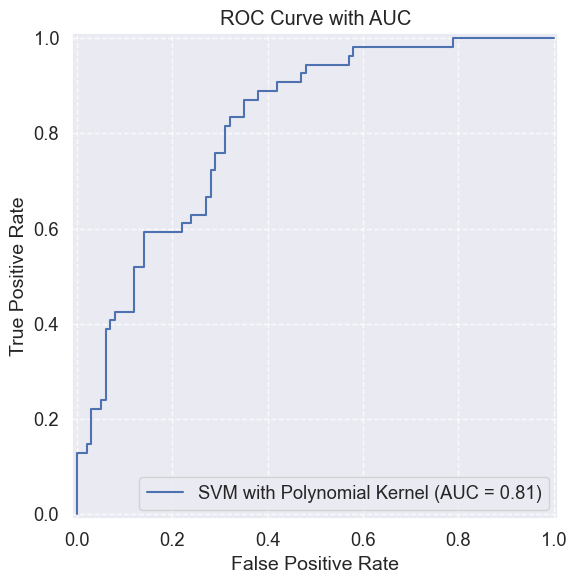

In [72]:
# Use decision_function instead of predict_proba for SVM if probability=True is not set
y_pred_prob = gs_svc_poly.decision_function(X_test)  # Use scores for ROC and AUC

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)  # AUC using decision scores

# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(
    estimator=gs_svc_poly,
    X=X_test,
    y=y_test,
    ax=ax,
    name="SVM with Polynomial Kernel"  # Update the name if needed
)

# Enhance plot appearance
ax.set_title(f"ROC Curve with AUC")
ax.set_xlabel("False Positive Rate", fontsize=14)
ax.set_ylabel("True Positive Rate", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()

# Show plot
plt.show()

### 6.2 Creating a confusion matrix

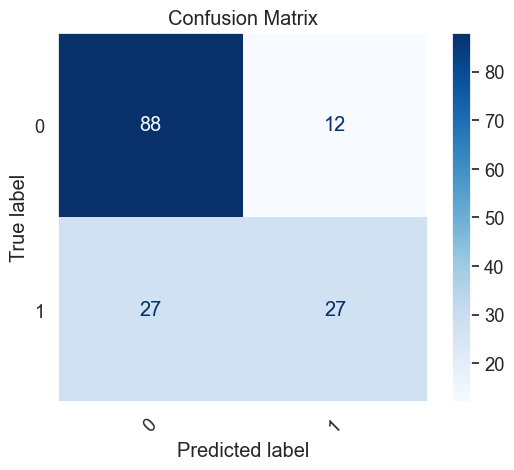

In [44]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gs_svc_poly.classes_)
disp.plot(cmap="Blues", values_format="d", xticks_rotation=45)
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()


### 6.3 Classification report

In [45]:
print("Classification Report:\n")
report = classification_report(y_test, y_preds, output_dict=True)
report_df = pd.DataFrame(report).T
display(report_df.style.format(subset=["precision", "recall", "f1-score"]))

Classification Report:



,precision,recall,f1-score,support
0,0.765217,0.880000,0.818605,100.000000
1,0.692308,0.500000,0.580645,54.000000
accuracy,0.746753,0.746753,0.746753,0.746753
macro avg,0.728763,0.690000,0.699625,154.000000
weighted avg,0.739652,0.746753,0.735164,154.000000


### 6.4 Cross-validated metrics

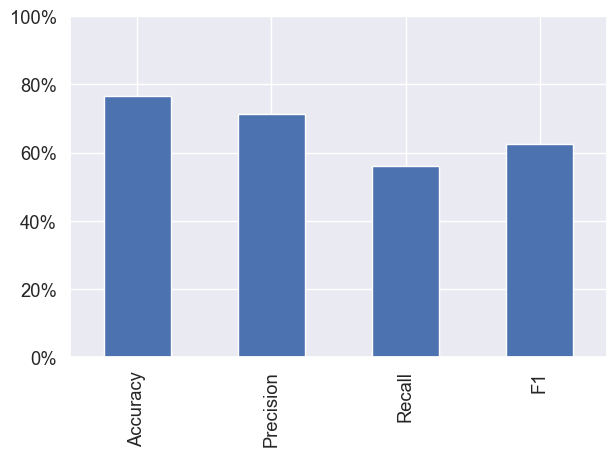

In [46]:

# clf using the best hyperparameters from GridSearchCV
clf = LogisticRegression(C=gs_svc_poly.best_params_['C'], solver="liblinear")

# Cross-validated metrics
cv_metrics = {
    "Accuracy": np.mean(cross_val_score(clf, X, y, cv=5, scoring="accuracy")),
    "Precision": np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision")),
    "Recall": np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall")),
    "F1": np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1")),
}

# Convert metrics to DataFrame
cv_metrics_df = pd.DataFrame(cv_metrics, index=["Score"]).T
cv_metrics_df.columns = ["Cross-Validated"]

# Plot metrics
cv_metrics_df.plot(kind="bar", legend=False)

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# Set y-axis limits and format y-axis to percentage
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

# Show plot
plt.tight_layout()
plt.show()

# 7. Feature importance

/var/folders/ty/pzq_b8jn4k7bxn69m1pm52z00000gn/T/ipykernel_33041/1352098923.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=features_df, x="Importance", y="Feature", palette="viridis")


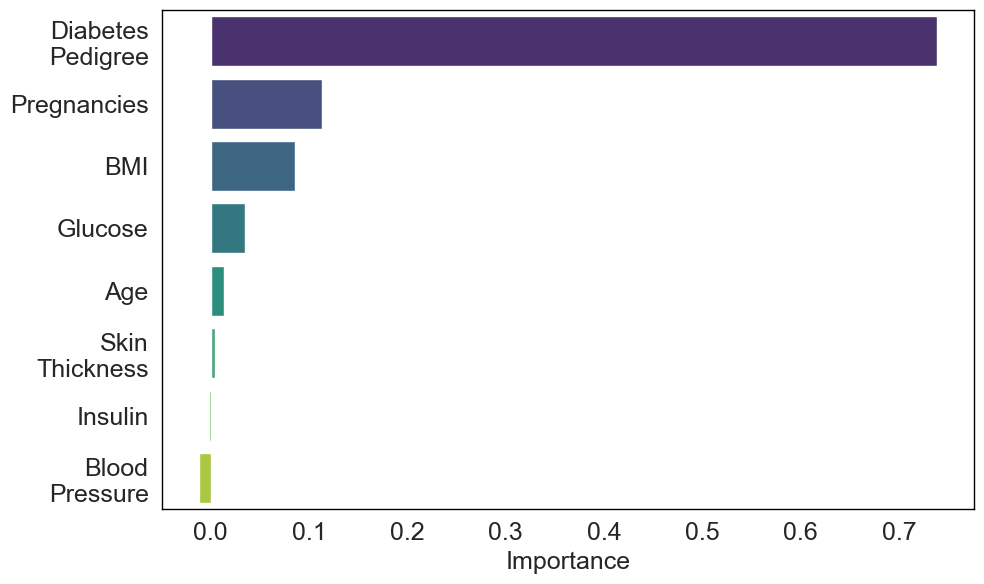

In [71]:
# Create a mapping dictionary for feature name display
feature_name_mapping = {
    'DiabetesPedigreeFunction': 'Diabetes\nPedigree',
    'BloodPressure': 'Blood\nPressure',
    'SkinThickness': 'Skin\nThickness'
}

# Function to map feature names
def map_feature_names(feature):
    return feature_name_mapping.get(feature, feature)

# Extract coefficients and match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Convert to DataFrame and sort by importance
features_df = pd.DataFrame(features_dict.items(), columns=["Feature", "Importance"])
features_df = features_df.sort_values(by="Importance", ascending=False)

# Map the feature names to their display versions
features_df['Feature'] = features_df['Feature'].map(lambda x: map_feature_names(x))

# Visualize feature importance (sorted)
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_linewidth(1.0)
ax.spines['right'].set_linewidth(1.0)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)
sns.barplot(data=features_df, x="Importance", y="Feature", palette="viridis")
plt.xlabel("Importance", fontsize=18)
plt.ylabel("")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_facecolor('white')
plt.ylabel("")
plt.tight_layout()
plt.show()